In [ ]:
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(42)
data = {
    "timestamp": pd.date_range(start="2024-01-01", periods=1000, freq="H"),
    "cpu_usage": np.random.uniform(10, 90, 1000),
    "memory_usage": np.random.uniform(100, 8000, 1000),
    "network_io": np.random.uniform(1, 100, 1000),
    "pod_status": np.random.choice([0, 1], size=1000, p=[0.9, 0.1])  # 10% failures
}

df = pd.DataFrame(data)
df.to_csv("/content/k8s_simulated_data.csv", index=False)
print("Synthetic Kubernetes data generated.")

Synthetic Kubernetes data generated.


<ipython-input-3-c5eb8c691a0d>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "timestamp": pd.date_range(start="2024-01-01", periods=1000, freq="H"),


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/k8s_simulated_data.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())

# Display the first 5 rows
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Display column names
print("\nColumn Names in Dataset:")
print(df.columns)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     1000 non-null   object 
 1   cpu_usage     1000 non-null   float64
 2   memory_usage  1000 non-null   float64
 3   network_io    1000 non-null   float64
 4   pod_status    1000 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 39.2+ KB
None

First 5 Rows of the Dataset:
             timestamp  cpu_usage  memory_usage  network_io  pod_status
0  2024-01-01 00:00:00  39.963210   1562.550138   26.908863           0
1  2024-01-01 01:00:00  86.057145   4381.017484   25.450901           0
2  2024-01-01 02:00:00  68.559515   6996.272103   90.719203           0
3  2024-01-01 03:00:00  57.892679   5884.576603   25.705074           0
4  2024-01-01 04:00:00  22.481491   6471.833068   27.923023           0

Column Names in Dataset:
Index(['timestamp', 

In [ ]:
# Display summary statistics
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())

# Display summary statistics for categorical columns
print("\nStatistical Summary of Categorical Columns:")
print(df.describe(include=['O']))  # 'O' means object type (categorical)


Statistical Summary of Numerical Columns:
         cpu_usage  memory_usage   network_io   pod_status
count  1000.000000   1000.000000  1000.000000  1000.000000
mean     49.220524   4105.436711    50.738167     0.088000
std      23.370989   2308.300158    28.776745     0.283437
min      10.370562    125.424282     1.001152     0.000000
25%      28.877861   2004.486742    26.873747     0.000000
50%      49.744590   4197.997861    50.560778     0.000000
75%      69.545567   6107.673953    76.151249     0.000000
max      89.977414   7995.368434    99.784265     1.000000

Statistical Summary of Categorical Columns:
                  timestamp
count                  1000
unique                 1000
top     2024-02-11 15:00:00
freq                      1


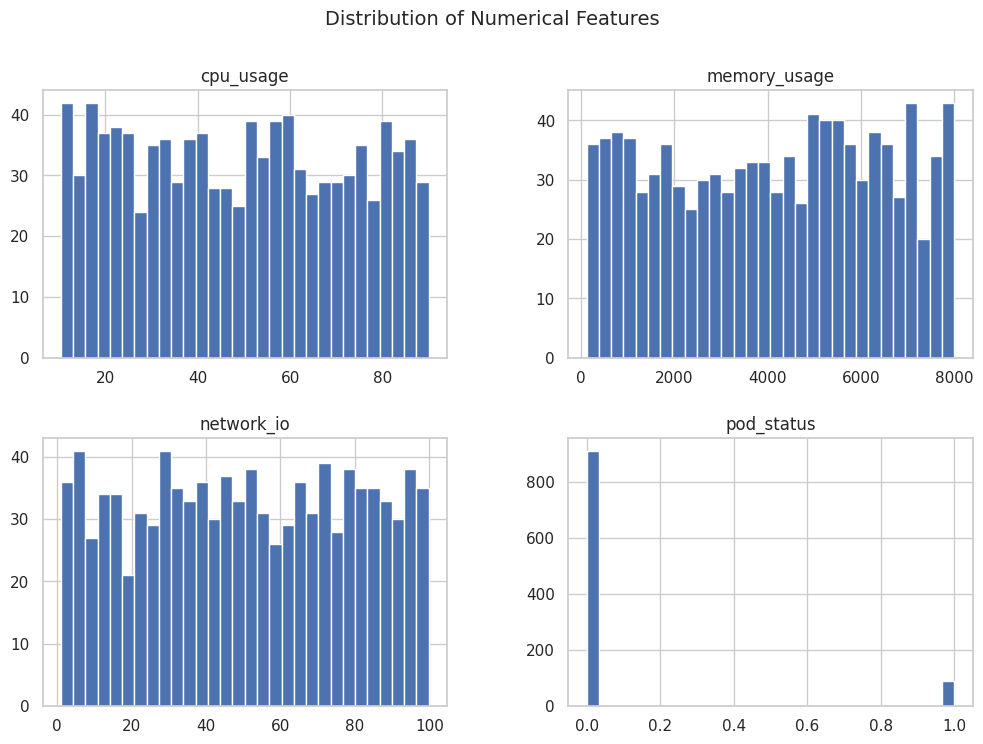

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Histogram for numerical columns
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

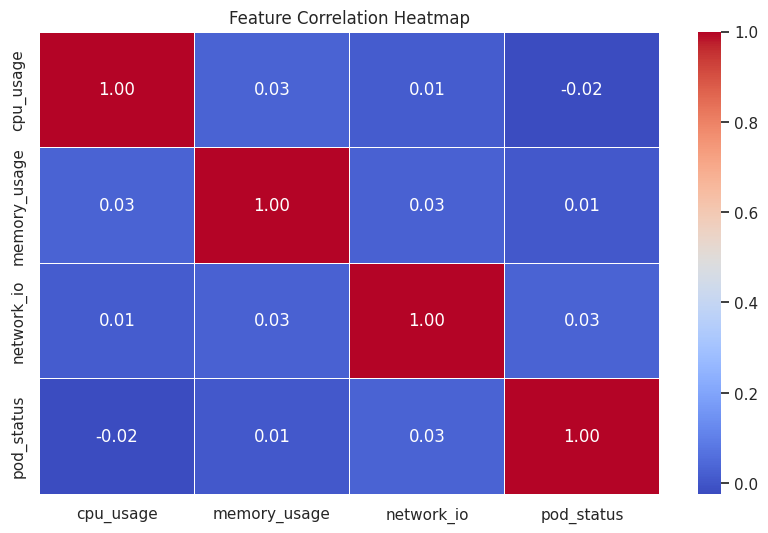

In [ ]:
# Exclude non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

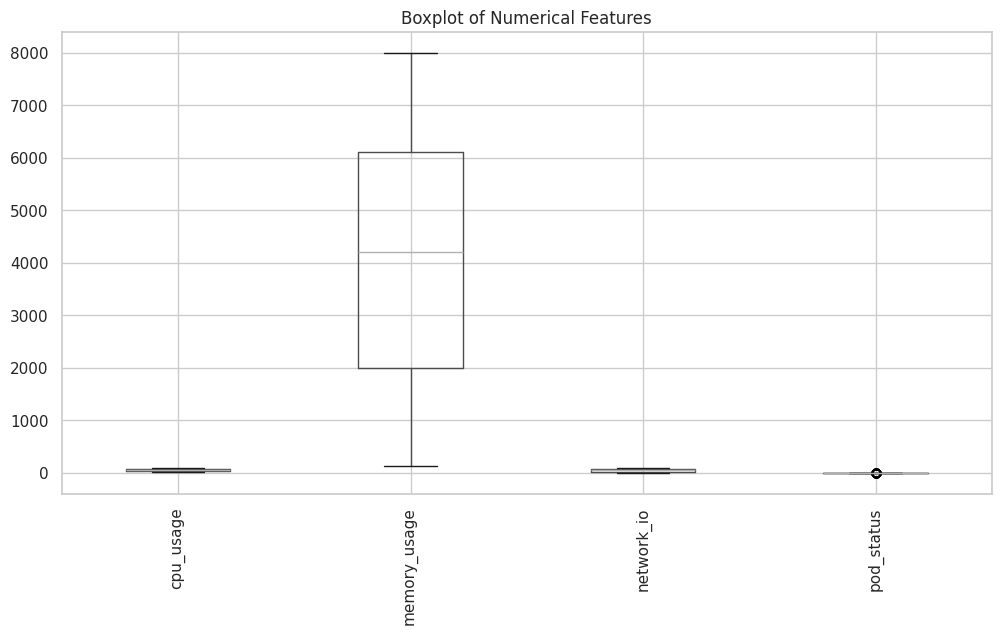

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
df.boxplot(rot=90)
plt.title("Boxplot of Numerical Features")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = "/content/k8s_simulated_data.csv"  # Change this if needed
df = pd.read_csv(file_path)

# Drop the timestamp column (not needed for training)
df = df.drop(columns=["timestamp"], errors="ignore")

# Define features (X) and target (y)
X = df[['cpu_usage', 'memory_usage', 'network_io']]
y = df['pod_status']

# Handle class imbalance using SMOTE (Oversampling failures)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Model Performance:\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-score: {f1:.2f}")

# Save the trained model
import joblib
joblib.dump(model, "k8s_failure_predictor.pkl")
print("Model saved as k8s_failure_predictor.pkl")

Model Performance:
Accuracy: 0.81
Precision: 0.78
Recall: 0.86
F1-score: 0.82
Model saved as k8s_failure_predictor.pkl


In [ ]:
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("k8s_failure_predictor.pkl")

# Simulated real-time Kubernetes metrics
def get_k8s_metrics():
    metrics = {
        "cpu_usage": 90.5,  # Example CPU usage %
        "memory_usage": 4096 / 1024,  # Convert bytes to MB (Example: 4096MB)
        "network_io": 500.2  # Example Network IO in MB/s
    }
    return metrics

# Function to predict failure based on metrics
def predict_k8s_failure(metrics):
    # Convert dictionary to DataFrame for model input
    input_data = pd.DataFrame([metrics.values()], columns=metrics.keys())

    # Make a prediction
    prediction = model.predict(input_data)[0]

    # Return human-readable result
    return "🚨 FAILURE DETECTED! Immediate action needed!" if prediction == 1 else "✅ System Healthy"

# Get real-time (simulated) metrics
real_time_metrics = get_k8s_metrics()

# Predict Kubernetes issue
prediction_result = predict_k8s_failure(real_time_metrics)

# Print the results
print(f"\n📊 Real-time Kubernetes Metrics: {real_time_metrics}")
print(f"🔍 Prediction Result: {prediction_result}")


📊 Real-time Kubernetes Metrics: {'cpu_usage': 90.5, 'memory_usage': 4.0, 'network_io': 500.2}
🔍 Prediction Result: ✅ System Healthy


In [ ]:
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("k8s_failure_predictor.pkl")

# Simulated real-time Kubernetes metrics
def get_k8s_metrics():
    metrics = {
        "cpu_usage": 90.0,  # Example CPU usage %
        "memory_usage": 7.5,  # Memory usage in GB
        "network_io": 900.0  # Network traffic in MB/s
    }
    return metrics

# Function to interpret prediction & suggest fixes
def interpret_prediction(metrics):
    input_data = pd.DataFrame([metrics.values()], columns=metrics.keys())
    prediction = model.predict(input_data)[0]

    # Check which metric is high
    issues = []
    if metrics["cpu_usage"] > 85:  # Adjust threshold if needed
        issues.append("High CPU usage ⚠️ (Consider scaling up pods)")
    if metrics["memory_usage"] > 6:  # Adjust based on your workload
        issues.append("High memory consumption 🔥 (Optimize resource allocation)")
    if metrics["network_io"] > 800:  # Network traffic threshold
        issues.append("High network I/O 📡 (Check network bottlenecks)")

    # Generate response
    if prediction == 1:
        result = "🚨 FAILURE DETECTED! Immediate action needed!"
        fix_suggestion = "⚠️ Possible Causes:\n" + "\n".join(issues)
    else:
        result = "✅ System Healthy"
        fix_suggestion = "No action needed. System is running fine."

    return result, fix_suggestion

# Run real-time prediction
real_time_metrics = get_k8s_metrics()
prediction_result, suggestion = interpret_prediction(real_time_metrics)

# Print the results
print(f"\n📊 Real-time Kubernetes Metrics: {real_time_metrics}")
print(f"🔍 Prediction Result: {prediction_result}")
print(f"💡 {suggestion}")


📊 Real-time Kubernetes Metrics: {'cpu_usage': 90.0, 'memory_usage': 7.5, 'network_io': 900.0}
🔍 Prediction Result: ✅ System Healthy
💡 No action needed. System is running fine.


In [ ]:
import pandas as pd
import numpy as np
import joblib

# Load the trained model
model = joblib.load("k8s_failure_predictor.pkl")

# Function to generate synthetic Kubernetes metrics
def generate_synthetic_data(num_samples=10):
    np.random.seed(42)  # For reproducibility
    test_data = pd.DataFrame({
        "cpu_usage": np.random.uniform(10, 100, num_samples),  # CPU usage between 10% - 100%
        "memory_usage": np.random.uniform(1, 16, num_samples),  # Memory between 1GB - 16GB
        "network_io": np.random.uniform(50, 1000, num_samples)  # Network I/O between 50MB - 1000MB
    })
    return test_data

# Function to test the model with synthetic data
def test_model_with_synthetic_data():
    test_data = generate_synthetic_data(10)  # Generate 10 test samples
    predictions = model.predict(test_data)  # Predict failures

    # Add predictions to test data
    test_data["predicted_status"] = ["🚨 FAILURE DETECTED!" if p == 1 else "✅ System Healthy" for p in predictions]

    # Print results
    print("\n🔍 Model Evaluation on Synthetic Data:")
    print(test_data)

# Run the test
test_model_with_synthetic_data()


🔍 Model Evaluation on Synthetic Data:
   cpu_usage  memory_usage  network_io  predicted_status
0  43.708611      1.308767  631.260250  ✅ System Healthy
1  95.564288     15.548648  182.519168  ✅ System Healthy
2  75.879455     13.486640  327.537416  ✅ System Healthy
3  63.879264      4.185087  398.043751  ✅ System Healthy
4  24.041678      3.727375  483.266485  ✅ System Healthy
5  24.039507      3.751068  795.917163  ✅ System Healthy
6  15.227525      5.563634  239.690093  ✅ System Healthy
7  87.955853      8.871346  538.522716  ✅ System Healthy
8  64.100351      7.479175  612.793840  ✅ System Healthy
9  73.726532      5.368437   94.127892  ✅ System Healthy


In [ ]:
import joblib
import pandas as pd

# Load model
model = joblib.load("k8s_failure_predictor.pkl")

# Check feature importance
feature_importance = model.feature_importances_
features = ["cpu_usage", "memory_usage", "network_io"]

# Print importance values
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print("\n📊 Feature Importance:\n", importance_df)


📊 Feature Importance:
         Feature  Importance
1  memory_usage    0.382859
0     cpu_usage    0.313443
2    network_io    0.303698


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("//content/k8s_simulated_data.csv")

# Features & target
X = df[['cpu_usage', 'memory_usage', 'network_io']]
y = df['pod_status']

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Retrain model with balanced data
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save fixed model
joblib.dump(model, "k8s_failure_predictor_fixed.pkl")
print("✅ Fixed model saved as k8s_failure_predictor_fixed.pkl")

✅ Fixed model saved as k8s_failure_predictor_fixed.pkl


In [ ]:
import pandas as pd
import numpy as np

# Function to generate realistic Kubernetes failure scenarios
def generate_realistic_test_data(num_samples=20):
    np.random.seed(42)  # For consistent results

    # Generate normal system behavior (70% of cases)
    normal_data = pd.DataFrame({
        "cpu_usage": np.random.uniform(10, 70, int(num_samples * 0.7)),  # CPU usage between 10-70%
        "memory_usage": np.random.uniform(1, 8, int(num_samples * 0.7)),  # Memory between 1GB - 8GB
        "network_io": np.random.uniform(50, 500, int(num_samples * 0.7))  # Network I/O between 50MB - 500MB
    })
    normal_data["true_status"] = 0  # Label as "Healthy"

    # Generate failure scenarios (30% of cases)
    failure_data = pd.DataFrame({
        "cpu_usage": np.random.uniform(85, 100, int(num_samples * 0.3)),  # High CPU usage 85-100%
        "memory_usage": np.random.uniform(10, 16, int(num_samples * 0.3)),  # High memory 10GB - 16GB
        "network_io": np.random.uniform(700, 1000, int(num_samples * 0.3))  # High Network I/O 700MB - 1000MB
    })
    failure_data["true_status"] = 1  # Label as "Failure"

    # Combine both normal and failure cases
    test_data = pd.concat([normal_data, failure_data], ignore_index=True)

    # Shuffle the dataset for randomness
    test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)

    return test_data

# Generate dataset
test_data = generate_realistic_test_data(20)

# Save test data to CSV
test_data.to_csv("realistic_k8s_test_data.csv", index=False)
print("✅ Realistic Kubernetes failure test data saved as realistic_k8s_test_data.csv")

# Display sample
print("\n📊 Sample Test Data:")
print(test_data.head())

✅ Realistic Kubernetes failure test data saved as realistic_k8s_test_data.csv

📊 Sample Test Data:
   cpu_usage  memory_usage  network_io  true_status
0  32.472407      2.272775  316.586556            0
1  94.937834     14.650797  758.794859            1
2  98.639806     11.109127  976.562271            1
3  67.042858      2.283832   70.902686            0
4  46.066901      3.045013  187.076196            0


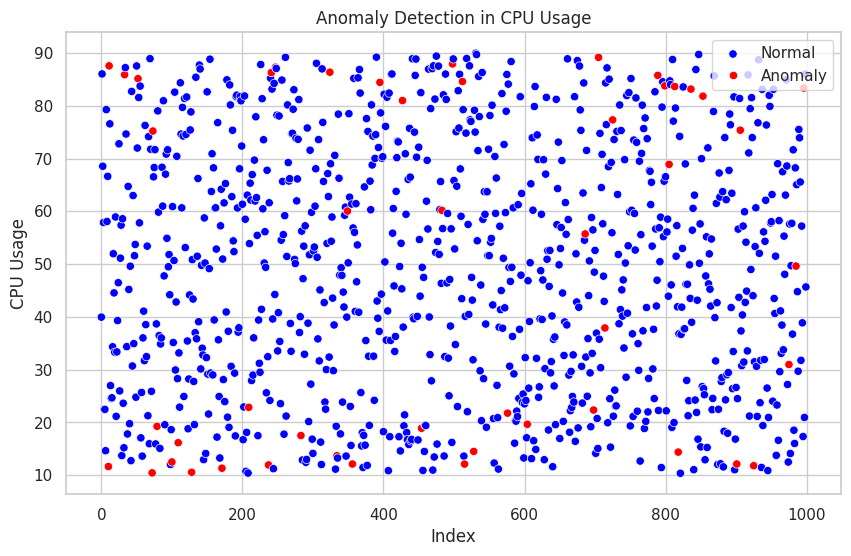

Anomaly Counts:
anomaly
 1    952
-1     48
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

# Load dataset
df = pd.read_csv("/content/k8s_simulated_data.csv")

# Select relevant numerical features (modify as per your dataset)
numeric_features = ['cpu_usage', 'memory_usage', 'network_io', 'pod_status']
df = df[numeric_features].dropna()

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Train One-Class SVM model
svm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)  # nu controls the proportion of outliers
df['anomaly'] = svm_model.fit_predict(df_scaled)

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['cpu_usage'], hue=df['anomaly'], palette={1: 'blue', -1: 'red'})
plt.title("Anomaly Detection in CPU Usage")
plt.xlabel("Index")
plt.ylabel("CPU Usage")
plt.legend(['Normal', 'Anomaly'])
plt.show()

# Count anomalies
print("Anomaly Counts:")
print(df['anomaly'].value_counts())

# Save anomalies to a CSV file
df[df['anomaly'] == -1].to_csv("/k8s_anomalies.csv", index=False)


In [ ]:
selected_features = ["cpu_usage", "memory_usage", "network_io", "pod_status"]
df = df[selected_features]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

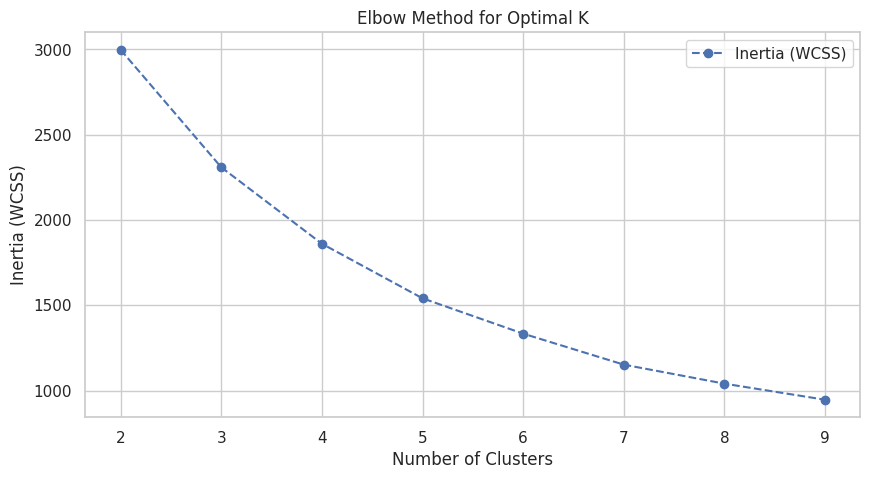

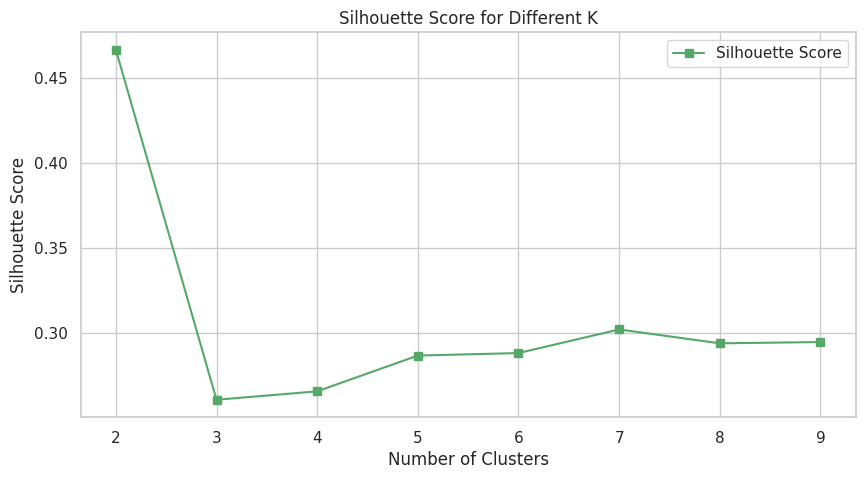

Optimal Number of Clusters (K) chosen based on silhouette score: 2
Silhouette Score for K=2: 0.4664


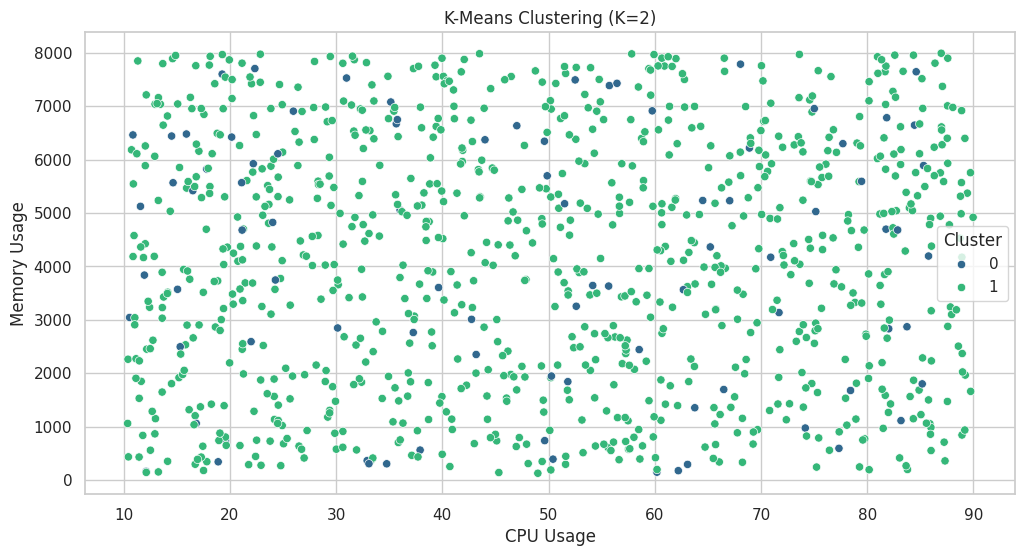

Clustered data saved to 'k8s_clustered_data.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
file_path = "/content/k8s_simulated_data.csv"  # Change if needed
df = pd.read_csv(file_path)

# Drop non-numeric columns
df = df.select_dtypes(include=[np.number]).dropna()

# Standardize numerical values
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Find the optimal number of clusters using Elbow Method & Silhouette Score
inertia = []
silhouette_scores = []
k_values = range(2, 10)  # Testing clusters from 2 to 9

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b', label="Inertia (WCSS)")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='s', linestyle='-', color='g', label="Silhouette Score")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.legend()
plt.show()

# Choose optimal K based on highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal Number of Clusters (K) chosen based on silhouette score: {optimal_k}")

# Train K-Means with optimal clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df_scaled)

# Print final silhouette score for chosen K
final_silhouette = silhouette_score(df_scaled, df["cluster"])
print(f"Silhouette Score for K={optimal_k}: {final_silhouette:.4f}")

# Visualize Clusters (only for 2D features)
if "cpu_usage" in df.columns and "memory_usage" in df.columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=df["cpu_usage"], y=df["memory_usage"], hue=df["cluster"], palette="viridis")
    plt.title(f"K-Means Clustering (K={optimal_k})")
    plt.xlabel("CPU Usage")
    plt.ylabel("Memory Usage")
    plt.legend(title="Cluster")
    plt.show()

# Save clustered results
df.to_csv("/k8s_clustered_data.csv", index=False)
print("Clustered data saved to 'k8s_clustered_data.csv'")

Anomaly Counts:
 anomaly
 1    949
-1     51
Name: count, dtype: int64


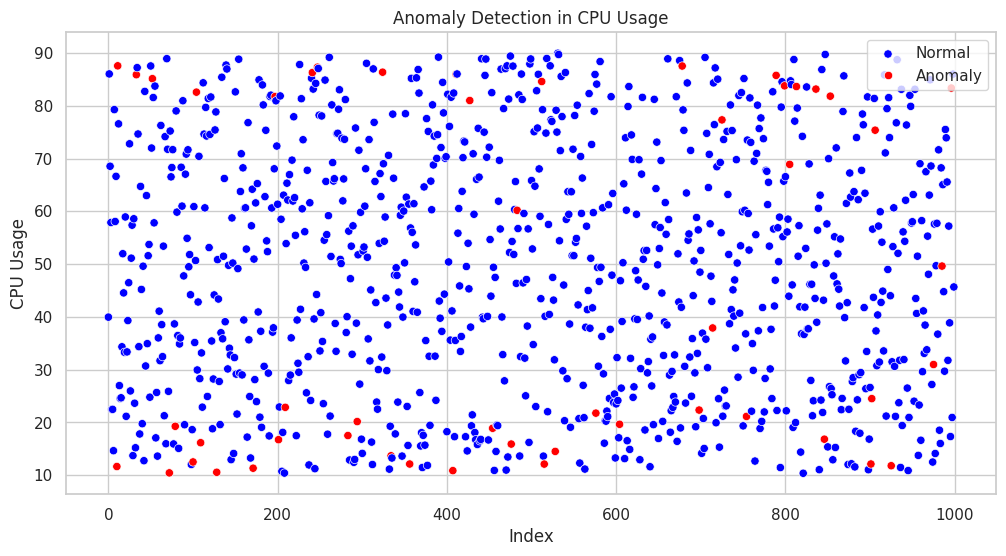

Anomalies saved to 'detected_anomalies.csv'


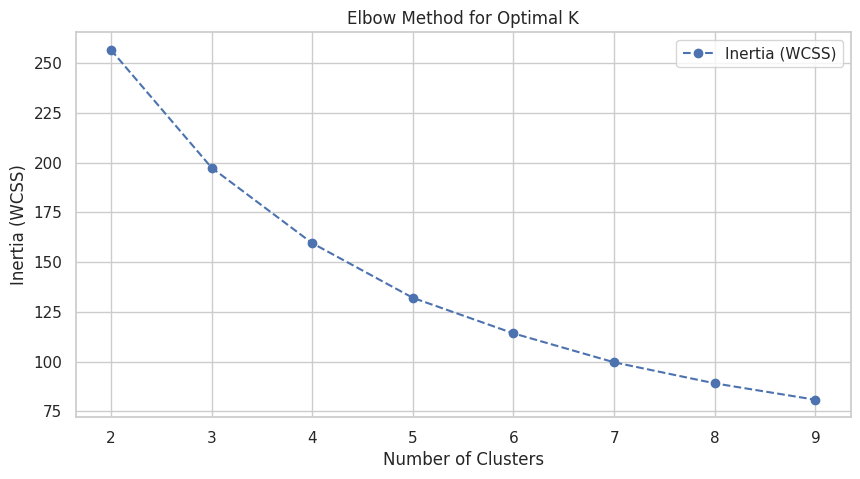

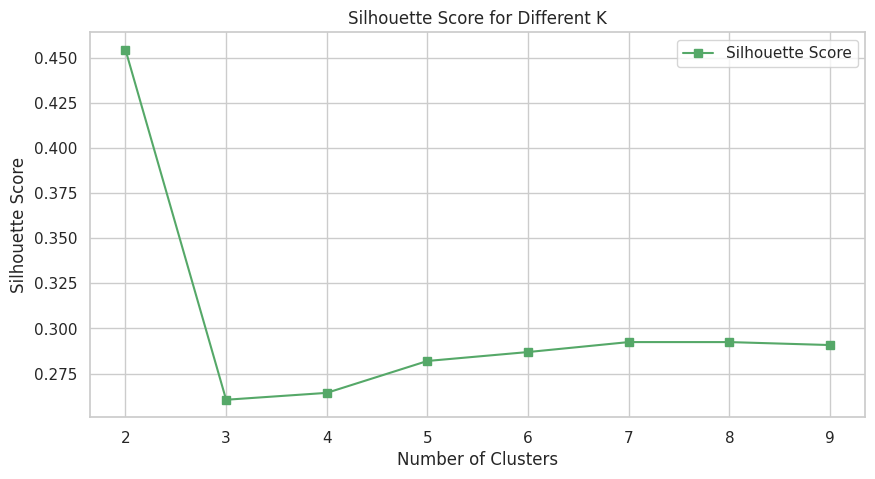

Optimal Number of Clusters (K) chosen based on silhouette score: 2
Silhouette Score for K=2: 0.4546


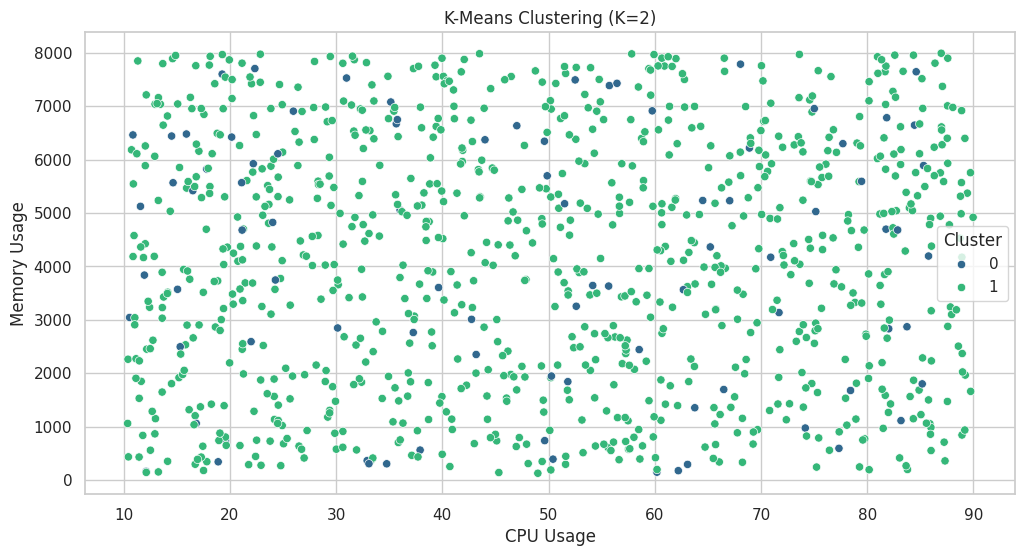

Clustered data saved to 'k8s_clustered_data.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score

# Load dataset
file_path = "/content/k8s_simulated_data.csv"  # Change if needed
df = pd.read_csv(file_path)

# Drop non-numeric columns
df = df.select_dtypes(include=[np.number]).dropna()

# Normalize numerical values using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

### === Option 1: Anomaly Detection using One-Class SVM === ###
ocsvm = OneClassSVM(kernel="rbf", gamma='auto', nu=0.05)  # nu controls the sensitivity
ocsvm.fit(df_scaled)

# Predict anomalies (-1 for anomaly, 1 for normal)
df["anomaly"] = ocsvm.predict(df_scaled)

# Evaluate accuracy (if true labels exist)
if "label" in df.columns:  # Assuming "label" column exists with 1 (normal) and -1 (anomalous)
    accuracy = accuracy_score(df["label"], df["anomaly"])
    print(f"One-Class SVM Model Accuracy: {accuracy * 100:.2f}%")

# Count anomalies
print("Anomaly Counts:\n", df["anomaly"].value_counts())

# Visualize anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y=df["cpu_usage"], hue=df["anomaly"], palette={1: "blue", -1: "red"})
plt.title("Anomaly Detection in CPU Usage")
plt.xlabel("Index")
plt.ylabel("CPU Usage")
plt.legend(["Normal", "Anomaly"])
plt.show()

# Save detected anomalies
df[df["anomaly"] == -1].to_csv("/detected_anomalies.csv", index=False)
print("Anomalies saved to 'detected_anomalies.csv'")

### === Option 2: K-Means Clustering for Failure Patterns === ###
# Find the optimal number of clusters using Elbow Method & Silhouette Score
inertia = []
silhouette_scores = []
k_values = range(2, 10)  # Testing clusters from 2 to 9

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b', label="Inertia (WCSS)")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='s', linestyle='-', color='g', label="Silhouette Score")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.legend()
plt.show()

# Choose optimal K based on highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal Number of Clusters (K) chosen based on silhouette score: {optimal_k}")

# Train K-Means with optimal clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df_scaled)

# Print final silhouette score for chosen K
final_silhouette = silhouette_score(df_scaled, df["cluster"])
print(f"Silhouette Score for K={optimal_k}: {final_silhouette:.4f}")

# Visualize Clusters (only for 2D features)
if "cpu_usage" in df.columns and "memory_usage" in df.columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=df["cpu_usage"], y=df["memory_usage"], hue=df["cluster"], palette="viridis")
    plt.title(f"K-Means Clustering (K={optimal_k})")
    plt.xlabel("CPU Usage")
    plt.ylabel("Memory Usage")
    plt.legend(title="Cluster")
    plt.show()

# Save clustered results
df.to_csv("/k8s_clustered_data.csv", index=False)
print("Clustered data saved to 'k8s_clustered_data.csv'")

### ***PHASE 2 SUBMISSION***

In [ ]:
import json

# Sample Phase 1 predictions
predictions = {
    "frontend-pod-1": "ResourceExhaustion_CPU",
    "backend-pod-2": "PodFailure",
    "api-pod-3": "NetworkIssue",
    "worker-pod-4": "MemoryLeak"
}

# Save it as a local JSON file
with open("phase1_predictions.json", "w") as f:
    json.dump(predictions, f)

In [ ]:
import subprocess
import json
import logging

logging.basicConfig(level=logging.INFO)

class K8sRemediator:
    def __init__(self, prediction_file='phase1_predictions.json'):
        with open(prediction_file, 'r') as f:
            self.predictions = json.load(f)

    def remediate(self):
        for pod, issue in self.predictions.items():
            logging.info(f"{pod}: {issue}")
            if issue == "ResourceExhaustion_CPU":
                self.scale_deployment(pod)
            elif issue == "PodFailure":
                self.restart_pod(pod)
            elif issue == "NetworkIssue":
                self.annotate(pod, "Investigate network policies")
            elif issue == "MemoryLeak":
                self.scale_deployment(pod, memory=True)

    def get_deployment(self, pod):
        try:
            result = subprocess.check_output(
                f"kubectl get pod {pod} -o jsonpath='{{.metadata.ownerReferences[0].name}}'",
                shell=True
            )
            return result.decode().strip()
        except:
            return None

    def scale_deployment(self, pod, memory=False):
        deploy = self.get_deployment(pod)
        if deploy:
            res = "memory" if memory else "cpu"
            logging.info(f"Scaling deployment {deploy} for {res}")
            subprocess.run(f"kubectl scale deployment {deploy} --replicas=3", shell=True)

    def restart_pod(self, pod):
        logging.info(f"Restarting pod {pod}")
        subprocess.run(f"kubectl delete pod {pod}", shell=True)

    def annotate(self, pod, note):
        subprocess.run(f"kubectl annotate pod {pod} remediation='{note}'", shell=True)

In [ ]:
agent = K8sRemediator()
agent.remediate()

In [ ]:
import subprocess

# Override subprocess.run for testing
def mock_run(cmd, shell=False, *args, **kwargs):
    print("Simulating:", cmd)
    class Dummy: returncode = 0
    return Dummy()

subprocess.run = mock_run

In [ ]:
import subprocess
import json
import logging
import os

logging.basicConfig(level=logging.INFO)

MOCK_MODE = True  # Toggle this to False for real kubectl calls

# Mocking logic
if MOCK_MODE:
    def mock_run(cmd, *args, **kwargs):
        print("[MOCK] Would run:", cmd)
        class Result:
            returncode = 0
        return Result()

    def mock_check_output(cmd, *args, **kwargs):
        print("[MOCK] Would fetch output from:", cmd)
        return b"mock-deployment-name"

    subprocess.run = mock_run
    subprocess.check_output = mock_check_output


class K8sRemediator:
    def __init__(self, prediction_file='phase1_predictions.json'):
        with open(prediction_file, 'r') as f:
            self.predictions = json.load(f)

    def remediate(self):
        for pod, issue in self.predictions.items():
            logging.info(f"{pod}: {issue}")
            if issue == "ResourceExhaustion_CPU":
                self.scale_deployment(pod)
            elif issue == "PodFailure":
                self.restart_pod(pod)
            elif issue == "NetworkIssue":
                self.annotate(pod, "Investigate network policies")
            elif issue == "MemoryLeak":
                self.scale_deployment(pod, memory=True)

    def get_deployment(self, pod):
        try:
            cmd = [
                "kubectl", "get", "pod", pod,
                "-o", "jsonpath={.metadata.ownerReferences[0].name}"
            ]
            result = subprocess.check_output(cmd)
            return result.decode().strip()
        except:
            return None

    def scale_deployment(self, pod, memory=False):
        deploy = self.get_deployment(pod)
        if deploy:
            reason = "memory" if memory else "cpu"
            logging.info(f"Scaling deployment {deploy} for {reason}")
            subprocess.run(["kubectl", "scale", "deployment", deploy, "--replicas=3"])

    def restart_pod(self, pod):
        logging.info(f"Restarting pod {pod}")
        subprocess.run(["kubectl", "delete", "pod", pod])

    def annotate(self, pod, note):
        subprocess.run(["kubectl", "annotate", "pod", pod, f"remediation={note}"])


if __name__ == "__main__":
    agent = K8sRemediator()
    agent.remediate()

[MOCK] Would fetch output from: ['kubectl', 'get', 'pod', 'frontend-pod-1', '-o', 'jsonpath={.metadata.ownerReferences[0].name}']
[MOCK] Would run: ['kubectl', 'scale', 'deployment', 'mock-deployment-name', '--replicas=3']
[MOCK] Would run: ['kubectl', 'delete', 'pod', 'backend-pod-2']
[MOCK] Would run: ['kubectl', 'annotate', 'pod', 'api-pod-3', 'remediation=Investigate network policies']
[MOCK] Would fetch output from: ['kubectl', 'get', 'pod', 'worker-pod-4', '-o', 'jsonpath={.metadata.ownerReferences[0].name}']
[MOCK] Would run: ['kubectl', 'scale', 'deployment', 'mock-deployment-name', '--replicas=3']
